In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from matplotlib import cycler
import joblib
from util import *

plt.style.use('fivethirtyeight')

colors = ['#16b713','#1A8FE3','#38369A','#9810B3','#D11149','#FF6201','#f3ba07']
plt.rc('axes',prop_cycle=cycler('color',colors))

In [6]:
DATA_FILE = '../data/cleaned.csv'
df = pd.read_csv(DATA_FILE)

In [7]:
def print_errors():
    print('1 try:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in1, preds1))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in1, preds1))

    print('2 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in2, preds2))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in2, preds2))

    print('3 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in3, preds3))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in3, preds3))

    print('4 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in4, preds4))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in4, preds4))

    print('5 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in5, preds5))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in5, preds5))

    print('6 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in6, preds6))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in6, preds6))

    print('more than 6 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.over6, preds7))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.over6, preds7))

In [8]:
def plot_results():
    x = range(len(preds1))
    fig = plt.figure(figsize=(10,8))

    fig.add_subplot(341)
    plt.title('1 try')
    plt.scatter(x,preds1)
    plt.scatter(x,y_test.in1)

    fig.add_subplot(342)
    plt.scatter(x,preds2)
    plt.scatter(x,y_test.in2)
    plt.title('2 tries')


    fig.add_subplot(343)
    plt.title('3 tries')
    plt.scatter(x,preds3)
    plt.scatter(x,y_test.in3)

    fig.add_subplot(344)
    plt.title('4 tries')
    plt.scatter(x,preds4)
    plt.scatter(x,y_test.in4)


    fig.add_subplot(345)
    plt.title('5 tries')
    plt.scatter(x,preds5)
    plt.scatter(x,y_test.in5)


    fig.add_subplot(346)
    plt.title('6 tries')
    plt.scatter(x,preds6)
    plt.scatter(x,y_test.in6)


    fig.add_subplot(347)
    plt.title('over 6 tries')
    plt.scatter(x,preds7)
    plt.scatter(x,y_test.over6)

    plt.subplots_adjust(hspace=0.3)
    plt.show()

# Predicting Distribution

1 try:
	mean_squared_error: 1.1555421510012545
	mean_absolute_error: 0.5551370970754858
2 tries:
	mean_squared_error: 9.555759514974364
	mean_absolute_error: 2.396162165253921
3 tries:
	mean_squared_error: 34.98538329853408
	mean_absolute_error: 4.576641057834847
4 tries:
	mean_squared_error: 21.40852390953771
	mean_absolute_error: 3.7026071416003905
5 tries:
	mean_squared_error: 21.134531923373682
	mean_absolute_error: 3.7479602931949154
6 tries:
	mean_squared_error: 24.641079700135144
	mean_absolute_error: 3.6562814030121564
more than 6 tries:
	mean_squared_error: 4.926782338351338
	mean_absolute_error: 1.6058079351794374


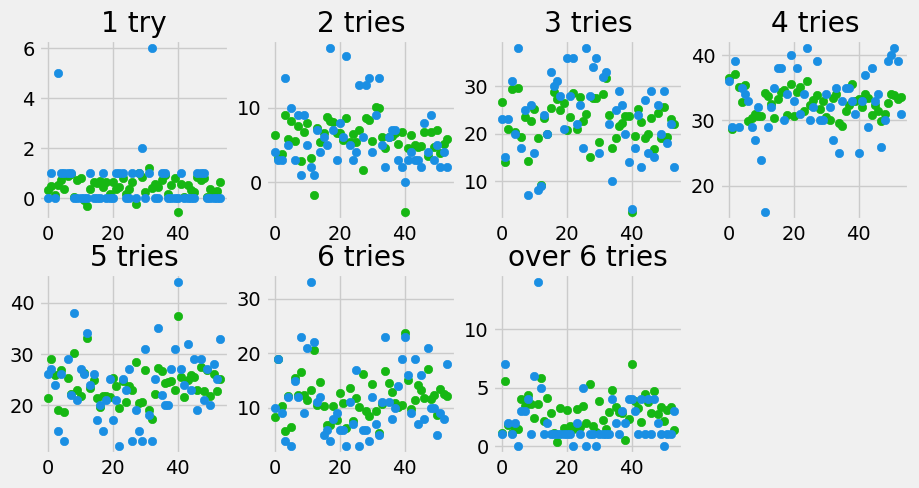

In [9]:
X = df[['contest_num','letter1_int','letter2_int','letter3_int','letter4_int','day_of_week','letter5_int','vowels','repeats']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

print_errors()
plot_results()

1 try:
	mean_squared_error: 1.0017536326405296
	mean_absolute_error: 0.5737628532193987
2 tries:
	mean_squared_error: 5.185287036159854
	mean_absolute_error: 1.761865144171277
3 tries:
	mean_squared_error: 6.1603531206528945
	mean_absolute_error: 1.9686987829575302
4 tries:
	mean_squared_error: 20.38901996979124
	mean_absolute_error: 3.6626699852265494
5 tries:
	mean_squared_error: 10.980845611756832
	mean_absolute_error: 2.469585917246119
6 tries:
	mean_squared_error: 4.441883291745584
	mean_absolute_error: 1.628254234350896
more than 6 tries:
	mean_squared_error: 3.8909274995130176
	mean_absolute_error: 1.592076499625403


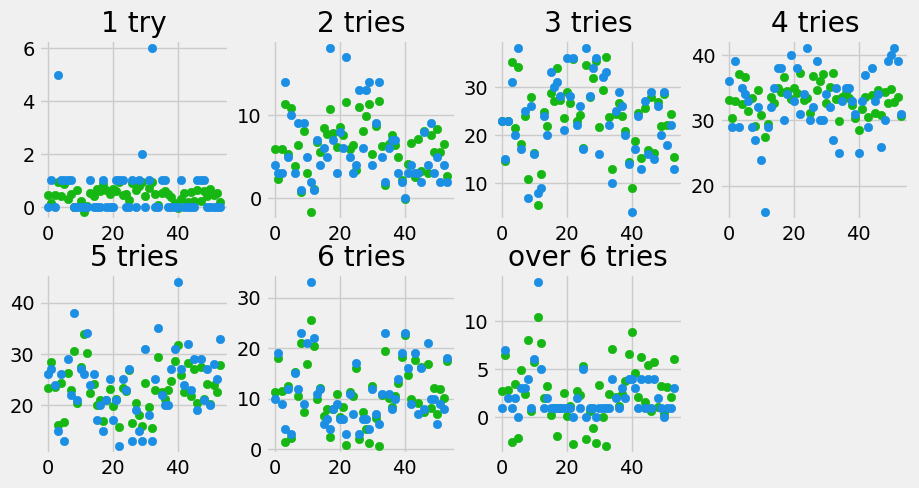

In [10]:
X = df[['avg_num_guesses']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

print_errors()
plot_results()

# Predicting Average Number of Guesses

	mean_squared_error: 0.10508978189054412
	mean_absolute_error: 0.26044852524074213


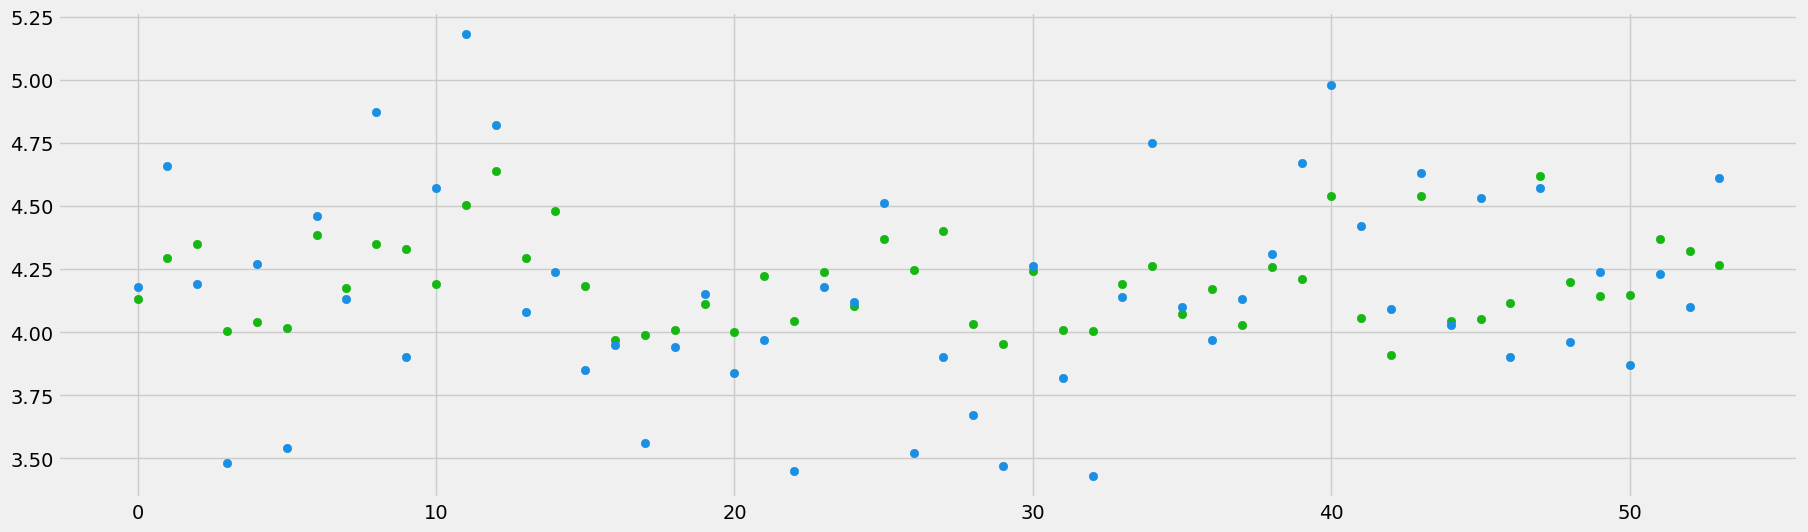

In [11]:
X = df[['word_score','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['avg_num_guesses']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print('\tmean_squared_error:', mean_squared_error(y_test, preds))
print('\tmean_absolute_error:', mean_absolute_error(y_test, preds))

plt.figure(figsize=(20,6))
plt.scatter(range(len(preds)),preds)
plt.scatter(range(len(preds)),y_test)
plt.show()

	mean_squared_error: 0.08843364366806791
	mean_absolute_error: 0.23627897940172243


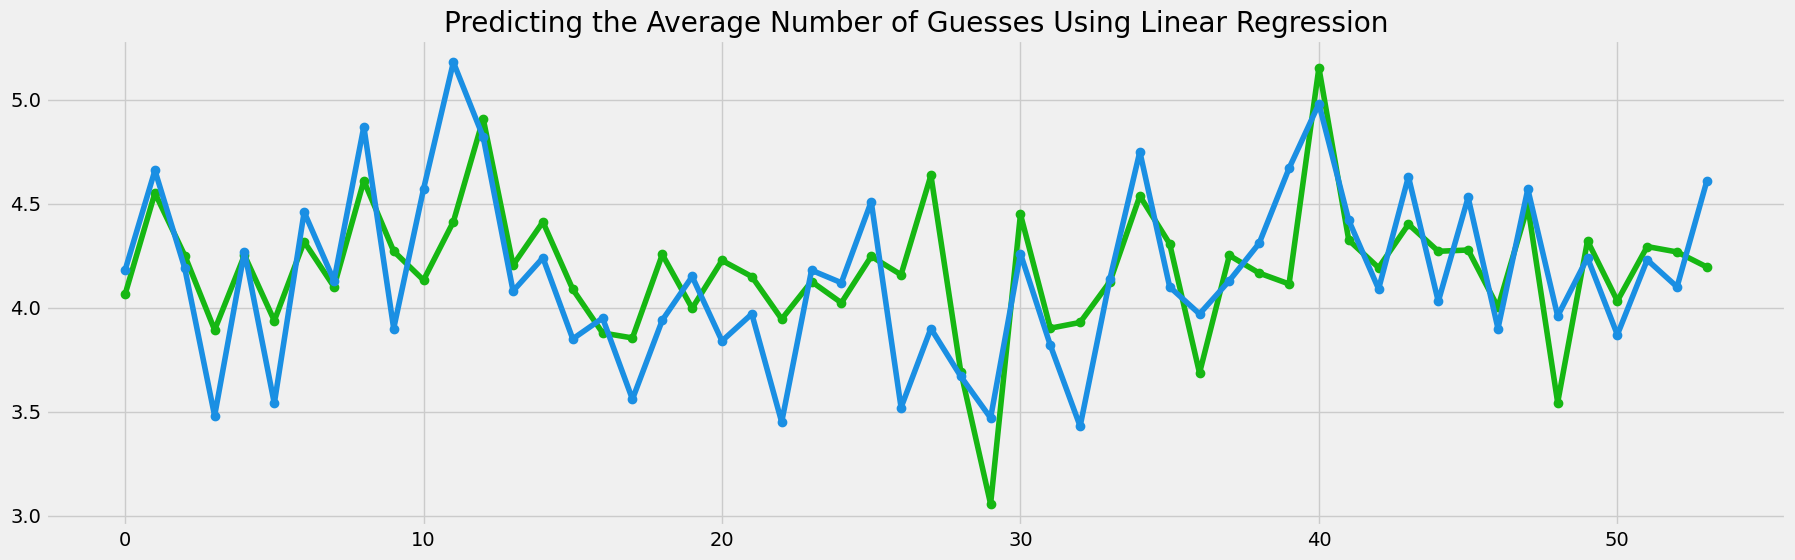

In [21]:
X = df[['word_score','vowels','repeats','word_occurrence','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['avg_num_guesses']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print('\tmean_squared_error:', mean_squared_error(y_test, preds))
print('\tmean_absolute_error:', mean_absolute_error(y_test, preds))

plt.figure(figsize=(20,6))
plt.title('Predicting the Average Number of Guesses Using Linear Regression')
plt.plot(range(len(preds)),preds,label='Predicted Average Guess',marker='o')
plt.plot(range(len(preds)),y_test,label='Actual Average',marker='o')

plt.show()

In [22]:
# Export the grid search model
joblib.dump(model, 'avg_guesses_model_lr.joblib')

['avg_guesses_model_lr.joblib']

In [14]:
df['avg_num_guesses'].describe()

count    359.000000
mean       4.192340
std        0.403655
min        3.100000
25%        3.935000
50%        4.170000
75%        4.420000
max        5.990000
Name: avg_num_guesses, dtype: float64

In [15]:
from util import *

In [19]:
get_info = lambda word: np.array([word_score(word),count_vowels(word),count_repeats(word),occurrence_score(word),get_letter_num(word[0]),get_letter_num(word[1]),get_letter_num(word[2]),get_letter_num(word[3]),get_letter_num(word[4])])
get_info('eerie')

array([2.11780545e+00, 4.00000000e+00, 2.00000000e+00, 5.72829315e-04,
       0.00000000e+00, 0.00000000e+00, 4.00000000e+00, 5.00000000e+00,
       0.00000000e+00])

In [20]:
model.predict(get_info('eerie').reshape(1,-1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.52507597]])